In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


In [30]:
#alg_label = ["G. LOUDS Backtracking", "G. LOUDS Optimal Order", 
#                "G. DFUDS Backtracking", "G. DFUDS Optimal Order",
 #               "R. LOUDS Backtracking", "R. LOUDS Optimal Order",
  #              "R. DFUDS Backtracking", "R. DFUDS Optimal Order"]
alg_label = ["Original",
             "Grad. LOUDS Backtrack.", 
             "Grad. LOUDS Op. Order", 
             "Grad. DFUDS Backtrack.", 
             "Grad. DFUDS Op. Order",
             "R. LOUDS Backtrack.", 
             "R. LOUDS Op. Order",
             "R. DFUDS Backtrack.", 
             "R. DFUDS Op. Order"]

queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3","ti4"]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T3","T4","Ti2","Ti3","Ti4 (log scale)"]

In [42]:
## PLOT FOR k>1000

# box plots for each query
# TODO: make file j3... variable
# TDO hacer un for para cada query y función y tamaño k
j3, j4, p2, p3, p4, s3, t2, t3, t4, ti2, ti3, ti4 = [],[],[],[],[],[],[],[],[],[],[],[]
data = [j3, j4, p2, p3, p4, s3, t2, t3, t4, ti2, ti3, ti4]
datasets =[[],[],[],[],[],[],[],[]]
for i,type_fun in enumerate([0]):#,1]):
    file = f"results-f{type_fun}-v1000.csv"
    print(file)
    
    original = pd.read_csv(f'../query1000results/original/results-v1000.csv',delimiter=';')
    
    partialLoudsBack = pd.read_csv(f'../query1000results/partial/louds/backtracking/{file}', delimiter=';')
    partialLoudsNon = pd.read_csv(f'../query1000results/partial/louds/optimalOrder/{file}', delimiter=';')
    partialDfudsBack = pd.read_csv(f'../query1000results/partial/dfuds/backtracking/{file}', delimiter=';')
    partialDfudsNon = pd.read_csv(f'../query1000results/partial/dfuds/optimalOrder/{file}', delimiter=';')

    rankedLoudsBack = pd.read_csv(f'../query1000results/ranked/louds/backtracking/{file}', delimiter=';')
    rankedLoudsNon = pd.read_csv(f'../query1000results/ranked/louds/optimalOrder/{file}', delimiter=';')
    rankedDfudsBack = pd.read_csv(f'../query1000results/ranked/dfuds/backtracking/{file}', delimiter=';')
    rankedDfudsNon = pd.read_csv(f'../query1000results/ranked/dfuds/optimalOrder/{file}', delimiter=';')
    
    datasets[i] = [partialLoudsBack, 
                   partialLoudsNon, 
                   partialDfudsBack, 
                   partialDfudsNon, 
                   rankedLoudsBack,
                   rankedLoudsNon, 
                   rankedDfudsBack, 
                   rankedDfudsNon]
    
 #   print(i)
    for j,query in enumerate(queries_label_v1000):
        data[j] = [original[query],
                   partialLoudsBack[query], 
                   partialLoudsNon[query], 
                   partialDfudsBack[query], 
                   partialDfudsNon[query], 
                   rankedLoudsBack[query], 
                   rankedLoudsNon[query], 
                   rankedDfudsBack[query], 
                   rankedDfudsNon[query]]
        

results-f0-v1000.csv


In [49]:
datasets[0][0]['k']


0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [38]:
variables = datasets[0][0].columns[1:]  # Excluir la columna 'k'
variables

Index(['j3', 'j4', 'p2', 'p3', 'p4', 's3', 't2', 't3', 't4', 'ti2', 'ti3',
       'ti4'],
      dtype='object')

In [39]:
colors = ['hotpink','red', 'peru','lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']

TypeError: 'other' must be an instance of matplotlib.axes._base._AxesBase, not a list

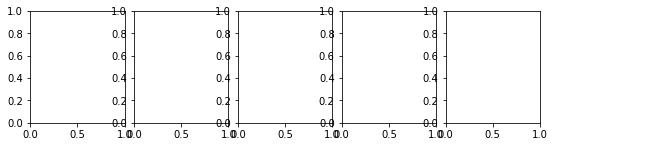

In [46]:
# Crear la figura
fig = plt.figure(figsize=(11, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.2, wspace=0.1)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1], sharex=j3, sharey=j3)
p2 = fig.add_subplot(gs[0, 2], sharex=j3, sharey=j3)
p3 = fig.add_subplot(gs[0, 3], sharex=j3, sharey=j3)
p4 = fig.add_subplot(gs[0, 4], sharex=j3, sharey=j3)
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s3 = fig.add_subplot(gs[1, 2], sharex=j3, sharey=s3)
t2 = fig.add_subplot(gs[1, 4], sharex=j3, sharey=s3)
t3 = fig.add_subplot(gs[1, 5], sharex=j3, sharey=s3)

t4 = fig.add_subplot(gs[2, 0], sharex=j3)
ti2 = fig.add_subplot(gs[2, 1], sharex=j3, sharey=t4)
ti3 = fig.add_subplot(gs[2, 2], sharex=j3, sharey=t4)
ti4 = fig.add_subplot(gs[2, 5], sharex=j3)

#j3.set_ylabel('Time (ms)')
#s3.set_ylabel('Time (ms)')
#s3.set_ylabel('Time (ms)')
#t4.set_ylabel('Time (ms)')

#t4.set_xlabel('k results')
#ti2.set_xlabel('k results')
#ti3.set_xlabel('k results')
#ti4.set_xlabel('k results')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3, j4, p2, p3, p4, s3, t2, t3, t4, ti2, ti3, ti4]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    #query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    #query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    #if(query != j3 and query != t4):
     #   query.axes.get_yaxis().set_visible(False)
    #if(query != t4 and query != ti2 and query != ti3 and query != ti4):
    #    query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()
color_legend.legend(handles, labels, loc='center', fontsize='x-small')


plt.savefig('/Users/asugomez/Desktop/Magister/Tesis/tesisQdags/imagenes/all_queries_k_1_10_100_1000_v1-v1000.pdf')

plt.show()
 

i:  0
AxesSubplot(0.125,0.466887;0.369048x0.0712264)
i:  1
AxesSubplot(0.125,0.295943;0.369048x0.0712264)
i:  2
AxesSubplot(0.125,0.808774;0.369048x0.0712264)
i:  3
AxesSubplot(0.125,0.63783;0.369048x0.0712264)
i:  4
AxesSubplot(0.530952,0.466887;0.369048x0.0712264)
i:  5
AxesSubplot(0.530952,0.552358;0.369048x0.0712264)
i:  6
AxesSubplot(0.125,0.125;0.369048x0.0712264)
i:  7
AxesSubplot(0.125,0.723302;0.369048x0.0712264)
i:  8
AxesSubplot(0.530952,0.295943;0.369048x0.0712264)
i:  9
AxesSubplot(0.530952,0.808774;0.369048x0.0712264)
i:  10
AxesSubplot(0.125,0.381415;0.369048x0.0712264)
i:  11
AxesSubplot(0.125,0.210472;0.369048x0.0712264)


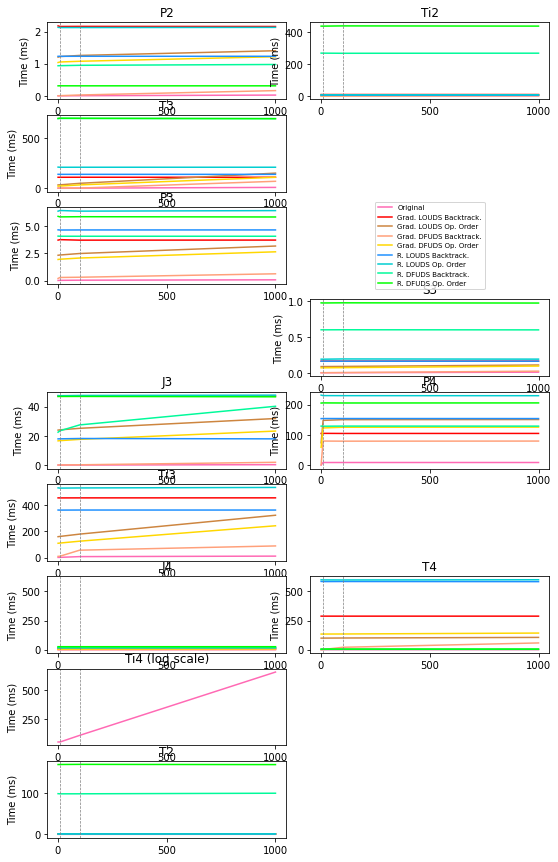

In [51]:
# Crear la figura
fig = plt.figure(figsize=(9,15))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(9, 2, figure=fig, hspace=0.2, wspace=0.1)

# Añadir los subplots a la figura
#j3 = fig.add_subplot(gs[6, 0])
#j3 = fig.add_subplot(gs[0, 0])
t2 = fig.add_subplot(gs[8, 0], sharex=j3)

p2 = fig.add_subplot(gs[0, 0], sharex=j3)
ti2 = fig.add_subplot(gs[0,1], sharex=j3)

t3 = fig.add_subplot(gs[1, 0], sharex=j3)
#s4 = fig.add_subplot(gs[1, 1], sharex=j3)

p3 = fig.add_subplot(gs[2, 0], sharex=j3)

#s2 = fig.add_subplot(gs[3, 0], sharex=j3)
s3 = fig.add_subplot(gs[3, 1], sharex=j3)

j3 = fig.add_subplot(gs[4, 0],sharex=j3)
p4 = fig.add_subplot(gs[4, 1], sharex=j3)

ti3 = fig.add_subplot(gs[5,0], sharex=j3)

j4 = fig.add_subplot(gs[6, 0], sharex=j3)
t4 = fig.add_subplot(gs[6, 1], sharex=j3, sharey=j4)

ti4 = fig.add_subplot(gs[7, 0], sharex=j3)
color_legend = fig.add_subplot(gs[2, 1]) # Space for the legend
color_legend.axis('off')  # Hide the axis


#j4.set_ylabel('Time (ms)')
#j3.set_ylabel('Time (ms)')
#s2.set_ylabel('Time (ms)')
#s1.set_ylabel('Time (ms)')
#t2.set_ylabel('Time (ms)')
#tr1.set_ylabel('Time (ms)')
#t4.set_ylabel('Time (ms)')

#t4.set_xlabel('k results')
#ti3.set_xlabel('k results')
#ti4.set_xlabel('k results')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s2.set_ylim(1, 30)
#s1.set_ylim(1, 30)
#t2.set_ylim(1, 30)
#tr1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3, j4, p2, p3, p4, s3, t2, t3, t4, ti2, ti3, ti4]):
    print("i: ", i)
    print(query)
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    #query.set_xscale('log')
    #query.set_yscale('log')
    query.set_ylabel('Time (ms)')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    #query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    #if(query != j3 and query != j4 and query != s2 and query != s1 and query != t2 and query != tr1 and query != t4):
    #    query.axes.get_yaxis().set_visible(False)
    #if(query != t4 and query != ti3 and query != ti4):
     #   query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()
color_legend.legend(handles, labels, loc='center', fontsize='x-small')


plt.savefig('/Users/asugomez/Desktop/Magister/Tesis/tesisQdags/imagenes/all_queries_k_1_10_100_1000-v1000.pdf')

plt.show()
 